# GRAPE calculation of control fields for bell state implementation

Robert Johansson (robert@riken.jp)

In [354]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi

In [355]:
from qutip import *
qutip.settings.auto_tidyup = False

In [356]:
T = 2
times = np.linspace(0, T, 200)

In [357]:
#U = bell_state(state='00')

R = 100
H_ops = [# qubit 1: single-qubit control
         tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         # qubit 1: single-qubit control
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
    
          # # pairwise X-X interactions
             # tensor(sigmax(), sigmax()),
          # # pairwise Y-Y interactions
            # tensor(sigmay(), sigmay()),
          # pairwise Z-Z interactions
           tensor(sigmaz(), sigmaz()),
         ]

H_labels = [r'$u_{1x}$',
            r'$u_{1y}$',
            r'$u_{1z}$',
            
            r'$u_{2x}$',
            r'$u_{2y}$',
            r'$u_{2z}$',
            
             # r'$u_{xx}$',
             # r'$u_{yy}$',
             r'$u_{zz}$',
            

            
#             r'$u_{xxi}$',
#             r'$u_{ixx}$',
#             r'$u_{xix}$',
            
#             r'$u_{yyi}$',
#             r'$u_{iyy}$',
#             r'$u_{yiy}$',
            
#             r'$u_{zzi}$',
#             r'$u_{izz}$',
#             r'$u_{ziz}$',
        ]

In [358]:
H0 = 0 * pi * (tensor(sigmaz(), identity(2)) + 
               tensor(identity(2), sigmaz())) 

c_ops = []
H0

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [359]:
U=cnot()*tensor(hadamard_transform(),identity(2))
#U=cnot()
#U=tensor(hadamard_transform(),identity(2))
U

C:\Users\eande\AppData\Local\Temp\ipykernel_24492\2750797325.py:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U=cnot()*tensor(hadamard_transform(),identity(2))


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

# GRAPE

In [360]:
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive, plot_grape_control_fields, _overlap

In [361]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [362]:
u0 = np.array([np.random.rand(len(times)) * 2 * pi * 0.01 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

In [ ]:
result = cy_grape_unitary(U, H0, H_ops, R, times, phase_sensitive=False,
                          u_start=u0, progress_bar=TextProgressBar(),
                          eps=2*pi*5)

10.0%. Run time:   6.76s. Est. time left: 00:00:01:00
20.0%. Run time:  12.88s. Est. time left: 00:00:00:51
30.0%. Run time:  19.19s. Est. time left: 00:00:00:44
40.0%. Run time:  25.26s. Est. time left: 00:00:00:37
50.0%. Run time:  32.27s. Est. time left: 00:00:00:32


## Plot control fields for the bell entangling gate in the presense of single-qubit tunnelling

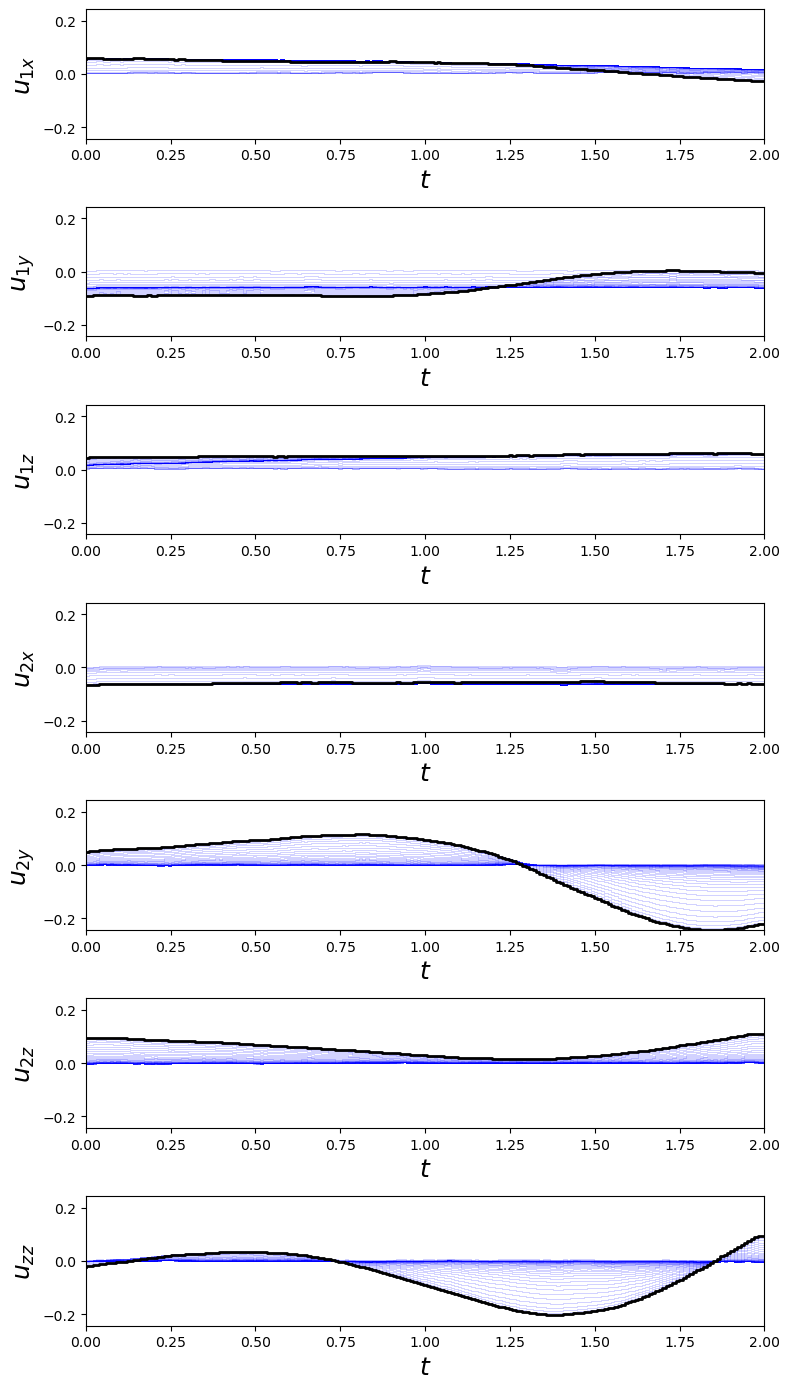

In [346]:
plot_grape_control_fields(times, result.u / (2 * pi), H_labels, uniform_axes=True);

## Fidelity of the resutling GRAPE gate

In [347]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

In [348]:
result.U_f.tidyup(1e-1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.52664136-0.48478209j  0.        +0.j          0.53312938-0.44087947j
   0.        +0.j        ]
 [ 0.        +0.j          0.49229163-0.51042974j  0.        +0.j
   0.43473138-0.54894507j]
 [-0.1045587 +0.j          0.52962487-0.45835536j  0.        +0.j
  -0.48404839+0.5125835j ]
 [ 0.46142526-0.51097914j  0.        +0.j         -0.51057343+0.50516714j
   0.        +0.j        ]]

In [349]:
result.U_f / result.U_f[0,0] #.tidyup(1e-1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        -5.55111512e-17j  0.        +0.00000000e+00j
   0.96512964+5.12646623e-02j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.98896008-5.88628464e-02j
   0.        +0.00000000e+00j  0.96623785-1.52912906e-01j]
 [-0.10747213-9.89298704e-02j  0.97806256+2.99859786e-02j
   0.        +0.00000000e+00j -0.98252496+6.88760931e-02j]
 [ 0.95775346-8.86322566e-02j  0.        +0.00000000e+00j
  -1.00277199+3.61559821e-02j  0.        +0.00000000e+00j]]

In [350]:
abs(_overlap(U, result.U_f))**2

0.9861947845317424

## Quantum process tomography of the ideal and GRAPE gates

### Ideal toffoli gate

In [351]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

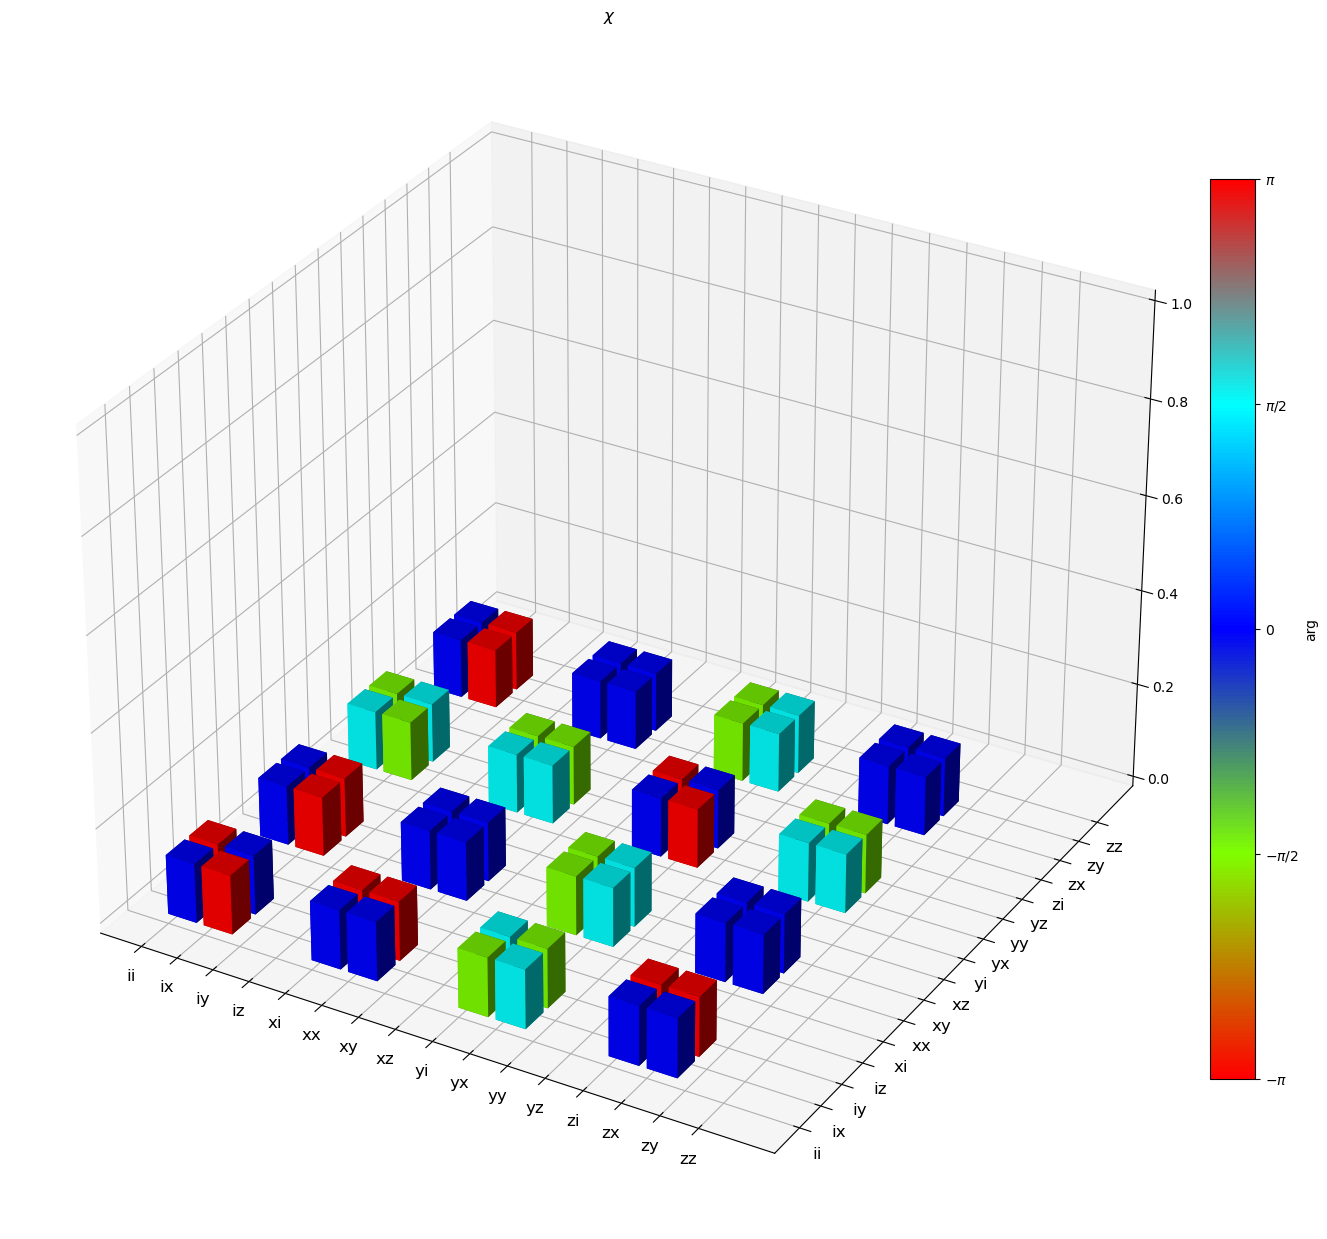

In [352]:
fig = plt.figure(figsize=(16,12))

SU = spre(U) * spost(U.dag())

chi = qpt(SU, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

### Toffoli gate calculated using GRAPE

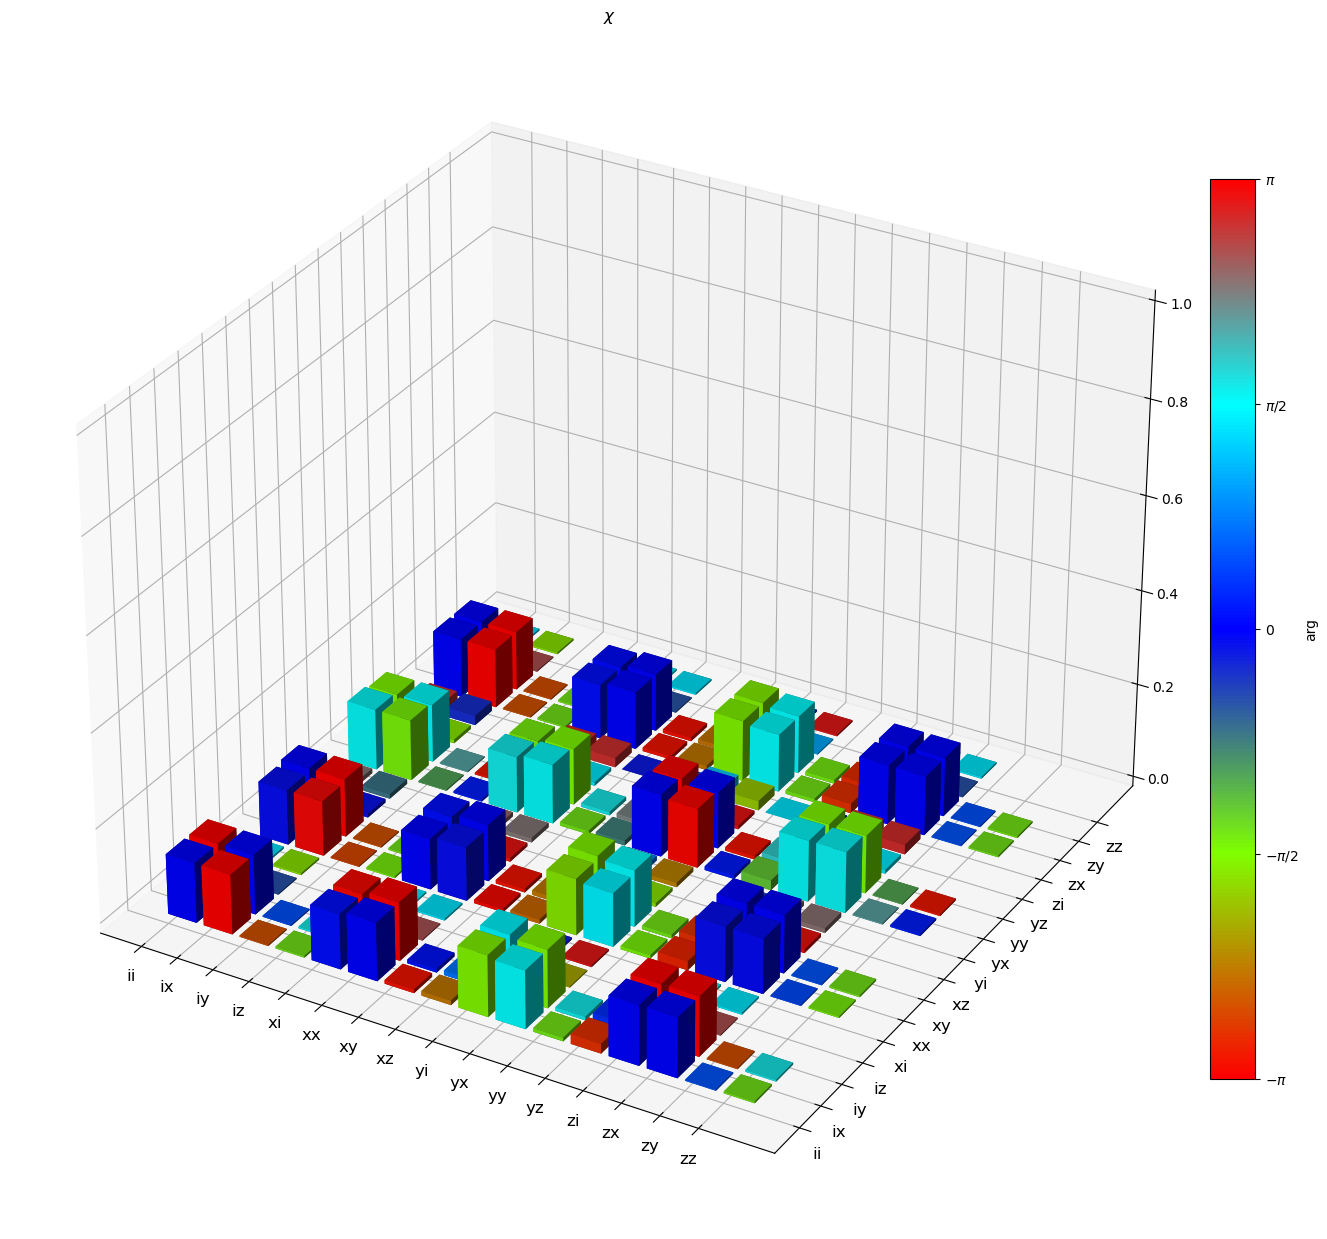

In [353]:
fig = plt.figure(figsize=(16,12))

SU = spre(result.U_f) * spost(result.U_f.dag())

chi = qpt(SU, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [42]:
from qutip.ipynbtools import version_table

version_table()